# datset reference -- https://pubs.acs.org/doi/10.1021/acscatal.9b04293

## Labels: Selectivity, Yeild, Conversion, Combo

### Synthesis methods:

#### Adapted: key terms: support1, M1,m1, CT, Total_flow, meth/oxy, arg_P, Temp, Name

"Name was prepared based on a co-impregnation method. A support support1 (1.0 g) was impregnated with 4.5 mL of an aqueous solution of consiting of M1 (m1),M2 (m2), M3 (m3), at 50 °C for 6 h. After vacuum drying at 110 °C, the product was calcined at 1000 °C under air for 3 h.Once Name is activated the reaction is ran at Temp °C. The total flow volume was Total_flow mL/min with flow ratios of  CH4/O2 meth/oxy mol/mol, and an Ar concentration of arg_P atm. The height of the catalyst bed was fixed at 10 mm, leading to a contact time of CT s at Total_flow ml/min." 

#### Original:
"The catalysts were prepared based on a co-impregnation method. A support substrate (1.0 g) was impregnated with 4.5 mL of an aqueous solution of specified metal precursors at 50 °C for 6 h. After vacuum drying at 110 °C, the product was calcined at 1000 °C under air for 3 h to yield a catalyst. When a water-sensitive metal alkoxide was employed, the impregnation was sequentially performed in the order of an aqueous solution of tungstate and an ethanol solution of a metal alkoxide. The obtained catalysts were thoroughly ground before any usage. The catalyst preparation was appropriately parallelized with the aids of a parallel hot stirrer (Reacti-Therm, Thermo Scientific) and a centrifugal evaporator (CVE-3100, Eyela). Twenty catalysts were produced in one batch. The samples were characterized by X-ray diffraction and scanning electron microscopy."

### Reaction conditions:

"Once catalysts are activated at 1000 °C for 160 min under O2, the temperature is stepwise declined from 900 to 850, 800, 775, 750, and 700 °C. At each temperature, the total flow volume (10, 15, and 20 mL/min/channel), the CH4/O2 ratio (2, 3, 4, and 6 mol/mol), and the Ar concentration (PAr = 0.15, 0.40, 0.70 atm) are stepwise varied. One reaction condition is held for 6–7 min, which allows 2–3 rounds of sampling in the same condition for acquiring the error range of observations. The ascending temperature protocol was not employed as it causes excessive CO and CO2 production due to the combustion of carbon deposits. The height of the catalyst bed was fixed at 10 mm, leading to a contact time of 0.75, 0.50, or 0.38 s at the given total flow volumes. Combined variations in the temperature, the total flow volume, the CH4/O2 ratio, and the Ar concentration lead to 216 conditions per catalyst and 4320 observations for 20 catalysts in a single automated operation."

In [17]:
import numpy as np
import pandas as pd
import bolift
from collections import OrderedDict
import cloudpickle

from dotenv import load_dotenv

load_dotenv("../.env")

True

In [18]:
name_dict = {
    'Name': 'name',
    'Support ': 'sup',
    'M1': 'm1',
    'M1_mol': 'm1_mol',
    'M2': 'm2',
    'M2_mol': 'm2_mol',
    'M3': 'm3',
    'M3_mol': 'm3_mol',
    'Temp': 'react_temp',
    'Total_flow': 'flow_vol',
    'Ar_flow': 'ar_vol',
    'CH4_flow': 'ch4_vol',
    'O2_flow': 'o2_vol',
    'CT': 'contact'
}

prompt_template = "To synthesize {name}, {sup} (1.0 g) was impregnated with 4.5 mL of an aqueous solution consisting of {m1} ({m1_mol} mol), {m2} ({m2_mol} mol), {m3} ({m3_mol} mol), "\
            "at 50 ºC for 6 h. Once activated the reaction is ran at {react_temp} ºC. "\
            "The total flow rate was {flow_vol} mL/min (Ar: {ar_vol} mL/min, CH4: {ch4_vol} mL/min, O2: {o2_vol} mL/min), "\
            "leading to a contact time of {contact} s."



Index(['name', 'm1', 'M1_atom_number', 'm2', 'M2_atom_number', 'm3',
       'M3_atom_number', 'sup', 'Support_ID', 'M2_mol', 'M3_mol', 'm1_mol',
       'm2_mol', 'm3_mol', 'react_temp', 'flow_vol', 'ar_vol', 'ch4_vol',
       'o2_vol', 'contact', 'CH4/O2', 'CH4_conv', 'C2y', 'C2H6y', 'C2H4y',
       'COy', 'CO2y', 'C2s', 'C2H6s', 'C2H4s', 'COs', 'CO2s'],
      dtype='object')


In [35]:
# round((((y["M1_mol%"])/100)*(y["M2_mol"]+y["M3_mol"])/(1-(y["M1_mol%"]/100))),3)
df = pd.read_csv('oxidative_methane_coupling.csv')

def calculate_M1_mol(row):
    return round((((row["M1_mol%"]) / 100) * (row["M2_mol"] + row["M3_mol"]) / (1 - (row["M1_mol%"] / 100))), 3)

df["M1_mol"] = df.apply(calculate_M1_mol, axis=1)
df.rename(columns=name_dict, inplace=True)

In [36]:
df["name"].unique()

array(['Mn-Na2WO4/BN', 'Mn-Na2WO4/MgO', 'Mn-Na2WO4/Al2O3',
       'Mn-Na2WO4/SiO2', 'Mn-Na2WO4/SiC', 'Mn-Na2WO4/SiCnf',
       'Mn-Na2WO4/BEA', 'Mn-Na2WO4/ZSM-5', 'Mn-Na2WO4/TiO2',
       'Mn-Na2WO4/ZrO2', 'Mn-Na2WO4/Nb2O5', 'Mn-Na2WO4/CeO2',
       'Mn-Li2WO4/SiO2', 'Mn-MgWO4/SiO2', 'Mn-K2WO4/SiO2',
       'Mn-CaWO4/SiO2', 'Mn-SrWO4/SiO2', 'Mn-BaWO4/SiO2',
       'Mn-Li2MoO4/SiO2', 'Mn-Na2MoO4/SiO2', 'Mn-K2MoO4/SiO2',
       'Mn-FeMoO4/SiO2', 'Mn-ZnMoO4/SiO2', 'Ti-Na2WO4/SiO2',
       'V-Na2WO4/SiO2', 'Fe-Na2WO4/SiO2', 'Co-Na2WO4/SiO2',
       'Ni-Na2WO4/SiO2', 'Cu-Na2WO4/SiO2', 'Zn-Na2WO4/SiO2',
       'Y-Na2WO4/SiO2', 'Zr-Na2WO4/SiO2', 'Mo-Na2WO4/SiO2',
       'Pd-Na2WO4/SiO2', 'La-Na2WO4/SiO2', 'Ce-Na2WO4/SiO2',
       'Nd-Na2WO4/SiO2', 'Eu-Na2WO4/SiO2', 'Tb-Na2WO4/SiO2',
       'Hf-Na2WO4/SiO2', 'Blank', 'BN', 'MgO', 'Al2O3', 'SiO2', 'SiC',
       'SiCnf', 'BEA', 'ZSM-5', 'TiO2', 'ZrO2', 'Nb2O5', 'CeO2',
       'Na2WO4/SiO2', 'Mn-WOx/SiO2', 'Mn-MoOx/SiO2', 'Mn-Na/SiO2',
       'WO

In [84]:
import pandas as pd

# Assuming df is your original DataFrame
# Filter out rows where 'react_temp' cannot be converted to numeric
df = df[pd.to_numeric(df['react_temp'], errors='coerce').notnull()]
df['react_temp'] = df['react_temp'].astype(float)

# Determine the 95th percentile of C2y in the entire dataset
percentile_95 = df['C2y'].quantile(0.95)

# Define the target catalyst and filter data
target_catalyst = "Mn-Na2WO4/SiO2"
target_data = df[df['name'] == target_catalyst]
other_data = df[df['name'] != target_catalyst]

# Calculate the counts and probabilities
target_above_95_count = len(target_data[target_data['C2y'] > percentile_95])
other_above_95_count = len(other_data[other_data['C2y'] > percentile_95])

target_total_count = len(target_data)
other_total_count = len(other_data)

prob_target_above_95 = target_above_95_count / target_total_count if target_total_count > 0 else 0
prob_other_above_95 = other_above_95_count / other_total_count if other_total_count > 0 else 0

# Calculate the difference in probabilities
prob_difference = prob_target_above_95 - prob_other_above_95

# Display the results
print(f"95th percentile threshold for C2y across the dataset: {percentile_95:.2f}")
print(f"Probability of C2y > {percentile_95:.2f} in '{target_catalyst}': {prob_target_above_95:.2%}")
print(f"Probability of C2y > {percentile_95:.2f} in other catalysts: {prob_other_above_95:.2%}")
print(f"Difference in probability: {prob_difference:.2%}")


95th percentile threshold for C2y across the dataset: 12.85
Probability of C2y > 12.85 in 'Mn-Na2WO4/SiO2': 24.07%
Probability of C2y > 12.85 in other catalysts: 4.62%
Difference in probability: 19.46%


In [86]:
import pandas as pd

# Assuming df is your original DataFrame
# Filter out rows where 'react_temp' cannot be converted to numeric
df = df[pd.to_numeric(df['react_temp'], errors='coerce').notnull()]
df['react_temp'] = df['react_temp'].astype(float)

# Determine the 99th percentile of C2y in the entire dataset
percentile_99 = df['C2y'].quantile(0.99)

# Define the target catalyst and filter data
target_catalyst = "Mn-Na2WO4/SiO2"
target_data = df[df['name'] == target_catalyst]
other_data = df[df['name'] != target_catalyst]

# Calculate the counts and probabilities
target_above_99_count = len(target_data[target_data['C2y'] > percentile_99])
other_above_99_count = len(other_data[other_data['C2y'] > percentile_99])

target_total_count = len(target_data)
other_total_count = len(other_data)

prob_target_above_99 = target_above_99_count / target_total_count if target_total_count > 0 else 0
prob_other_above_99 = other_above_99_count / other_total_count if other_total_count > 0 else 0

# Calculate the difference in probabilities
prob_difference = prob_target_above_99 - prob_other_above_99

# Display the results
print(f"99th percentile threshold for C2y across the dataset: {percentile_99:.2f}")
print(f"Probability of C2y > {percentile_99:.2f} in '{target_catalyst}': {prob_target_above_99:.2%}")
print(f"Probability of C2y > {percentile_99:.2f} in other catalysts: {prob_other_above_99:.2%}")
print(f"Difference in probability: {prob_difference:.2%}")


99th percentile threshold for C2y across the dataset: 16.17
Probability of C2y > 16.17 in 'Mn-Na2WO4/SiO2': 8.33%
Probability of C2y > 16.17 in other catalysts: 0.88%
Difference in probability: 7.45%


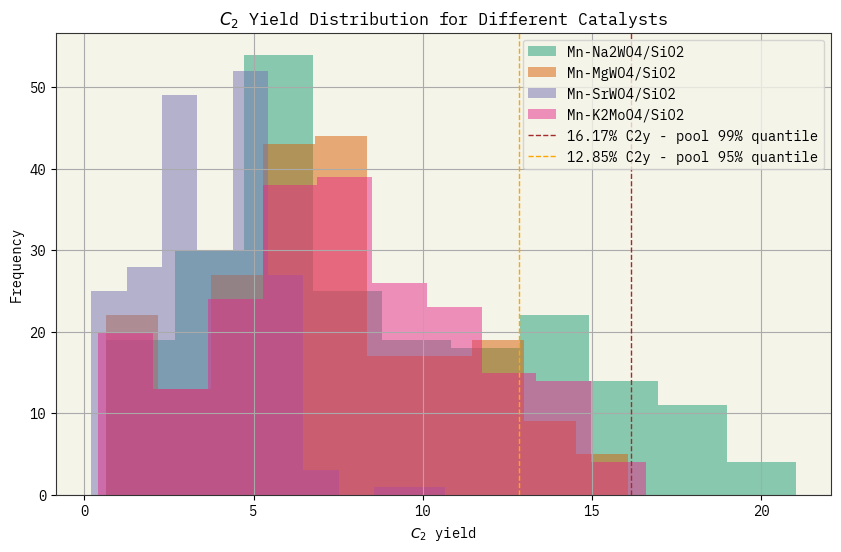

In [92]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your original DataFrame
# Filter and convert react_temp to float
filtered_df = filtered_df[pd.to_numeric(filtered_df['react_temp'], errors='coerce').notnull()]
filtered_df['react_temp'] = filtered_df['react_temp'].astype(float)

# Define the DataFrame and label pairs
dfs_labels = [
    (filtered_df, 'Mn-Na2WO4/SiO2'),
    (df[df['name'] == "Mn-MgWO4/SiO2"], 'Mn-MgWO4/SiO2'),
    (df[df['name'] == "Mn-SrWO4/SiO2"], 'Mn-SrWO4/SiO2'),
    (df[df['name'] == "Mn-K2MoO4/SiO2"], 'Mn-K2MoO4/SiO2')
]

# Plot histograms on the same plot
plt.figure(figsize=(10, 6))

for df, label in dfs_labels:
    plt.hist(df['C2y'], alpha=0.5, label=label)

# Add vertical lines at specified C2y values
plt.axvline(x=16.17, color='brown', linestyle='--', linewidth=1, label='16.17% C2y - pool 99% quantile')
plt.axvline(x=12.85, color='orange', linestyle='--', linewidth=1, label='12.85% C2y - pool 95% quantile')

plt.xlabel('$C_{2}$ yield')
plt.ylabel('Frequency')
plt.title('$C_{2}$ Yield Distribution for Different Catalysts')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
print(f"We have {len(df['name'].unique())} unique catalysts.")
filter = 216 # created dataset with 50, 100, 150, and 216 samples per catalyst
unique_catalysts = df['name'].unique()
filtered_df = pd.DataFrame()
for k in unique_catalysts:
    # print(f"{k:<18s}:{len(df[df['name'] == k])}")
    filtered_df = pd.concat([filtered_df, df[df['name'] == k].iloc[:filter]])
print(f"We created a pool of {len(filtered_df)} by selectin {filter} samples from each catalyst.")

# The last catalyst has only 180 available samples. That's why we have 12708 samples instead of 59*216 = 12744.
# (59*216) - (216-180) = 12708

We have 59 unique catalysts.
We created a pool of 12708 by selectin 216 samples from each catalyst.


In [38]:
with open(f'./data/{len(filtered_df)}_ocm_dataset.csv', 'w') as f:
    f.write("prompt;completion\n")
    for i, r in filtered_df.iterrows():
        props = OrderedDict({
            k:v for k,v in r.items() if k in name_dict.values()
        })

        f.write(f'{prompt_template.format(**props)};{r["C2y"]}\n')


In [ ]:
ocm_ds = pd.read_csv(f'./data/{filter*len(unique_catalysts)}_ocm_dataset.csv', sep=";")

pool = bolift.Pool(ocm_ds['prompt'].tolist(), formatter=lambda x: f"experimental procedure: {x}")
cloudpickle.dump(pool, open(f'./data/{filter*len(unique_catalysts)}_ocm_pool.pkl', 'wb'))

In [45]:
# props = OrderedDict()
# for k in name_dict.values():
#     props[k] = df[k].unique()

filtered_df = filtered_df[[k for k in name_dict.values()]]
pool = bolift.TreePool(filtered_df, prompt_template)
print(f"{pool}. The original pool has {len(df)} items")
cloudpickle.dump(pool, open(f'./data/{filter*len(unique_catalysts)}_ocm_treePool.pkl', 'wb'))

TreePool of 12708 with 0 selected. The original pool has 12708 items
